In [429]:
import pandas as pd
import seaborn as sns
import numpy as np

In [430]:
df = pd.read_csv('dataset.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


###### no null values detected

In [432]:
df.duplicated().sum()

401

In [433]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [434]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [435]:
df.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)

In [436]:
df.POSTED_BY.value_counts()

Dealer     17961
Owner      10470
Builder      619
Name: POSTED_BY, dtype: int64

In [437]:
df.ADDRESS.value_counts()

Zirakpur,Chandigarh                       474
Whitefield,Bangalore                      222
Raj Nagar Extension,Ghaziabad             212
Sector-137 Noida,Noida                    136
New Town,Kolkata                          129
                                         ... 
haripur phutkuwan Rampur Road,Haldwani      1
Kolshet,Lalitpur                            1
Ambika Township,Jivarajpark,Rajkot          1
Cheranalloor,Kochi                          1
E3-108, Lake View Recidency,,Vapi           1
Name: ADDRESS, Length: 6899, dtype: int64

In [438]:
len(df.ADDRESS.apply(lambda x: x.split(',')[1]).unique())

433

In [439]:
# thresholding the cities at 40 (replace cities occured less than 40 times in dataset with other)
def other_sub(x):
    if df[df.city == x]['city'].count() < 80:
        return 'other'
    else:
        return x

In [440]:
df['city'] = df.ADDRESS.apply(lambda x: x.split(',')[1])
df['city']

0                   Bangalore
1                      Mysore
2                   Bangalore
3                   Ghaziabad
4                     Kolkata
                 ...         
29045                    Agra
29046     Lake View Recidency
29047                  Jaipur
29048                 Chennai
29049                  Jaipur
Name: city, Length: 29050, dtype: object

In [441]:
df['city'] = df.city.apply(other_sub)
df['city']

0        Bangalore
1            other
2        Bangalore
3        Ghaziabad
4          Kolkata
           ...    
29045        other
29046        other
29047       Jaipur
29048      Chennai
29049       Jaipur
Name: city, Length: 29050, dtype: object

In [442]:
len(df['city'].value_counts())

42

In [443]:
df.drop(columns = ['ADDRESS'],inplace=True)

In [444]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,1,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,51.0,other
2,Owner,0,0,2,BHK,933.159722,1,1,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,60.5,Kolkata


In [445]:
df.BHK_OR_RK.value_counts()

BHK    29026
RK        24
Name: BHK_OR_RK, dtype: int64

In [446]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
count,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,2.003171e+04,0.821033,0.930361,141.712677
std,0.383332,0.464869,0.880677,1.914411e+06,0.383332,0.254541,650.055763
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,38.000000
50%,0.000000,0.000000,2.000000,1.172742e+03,1.000000,1.000000,61.750000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,30000.000000


In [447]:
df['square_meter'] = df.SQUARE_FT *0.09290304

In [448]:
df.drop(columns=['SQUARE_FT'], axis=1,inplace=True)

In [449]:
df.select_dtypes(exclude='number')

,POSTED_BY,BHK_OR_RK,city
0,Owner,BHK,Bangalore
1,Dealer,BHK,other
2,Owner,BHK,Bangalore
3,Owner,BHK,Ghaziabad
4,Dealer,BHK,Kolkata
...,...,...,...
29045,Owner,BHK,other
29046,Owner,BHK,other
29047,Dealer,BHK,Jaipur
29048,Owner,BHK,Chennai


### Encoding categories

In [450]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder

In [451]:
one_encoder = OneHotEncoder(sparse=False, drop='first')

In [452]:
cat = df.select_dtypes(exclude='number')

In [453]:
trans_one_cat = one_encoder.fit_transform(cat[['BHK_OR_RK','POSTED_BY']])

In [454]:
trans_one_cat = pd.DataFrame(trans_one_cat, columns=one_encoder.get_feature_names_out())

In [455]:
be = BinaryEncoder(drop_invariant=True)

In [456]:
b_encoded = be.fit_transform(cat['city'])
b_encoded

,city_0,city_1,city_2,city_3,city_4,city_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
29045,0,0,0,0,1,0
29046,0,0,0,0,1,0
29047,0,0,0,1,1,0
29048,0,0,1,0,0,0


In [457]:
df = pd.concat([df,trans_one_cat,b_encoded],axis=1)

In [458]:
df.drop(columns=['BHK_OR_RK','POSTED_BY','city'],inplace=True)

In [459]:
df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),square_meter,BHK_OR_RK_RK,POSTED_BY_Dealer,POSTED_BY_Owner,city_0,city_1,city_2,city_3,city_4,city_5
0,0,0,2,1,1,55.0,120.795915,0.0,0.0,1.0,0,0,0,0,0,1
1,0,0,2,1,1,51.0,118.451376,0.0,1.0,0.0,0,0,0,0,1,0
2,0,0,2,1,1,43.0,86.693375,0.0,0.0,1.0,0,0,0,0,0,1
3,0,1,2,1,1,62.5,86.392501,0.0,0.0,1.0,0,0,0,0,1,1
4,1,0,2,0,1,60.5,92.810996,0.0,1.0,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29045,0,0,3,1,1,45.0,232.257600,0.0,0.0,1.0,0,0,0,0,1,0
29046,0,0,2,1,1,16.0,71.463877,0.0,0.0,1.0,0,0,0,0,1,0
29047,0,0,2,1,1,27.1,95.006505,0.0,1.0,0.0,0,0,0,1,1,0
29048,0,0,2,1,1,67.0,86.128458,0.0,0.0,1.0,0,0,1,0,0,0


In [460]:
df['TARGET(PRICE_IN_LACS)'].describe()

count    29050.000000
mean       141.712677
std        650.055763
min          0.250000
25%         38.000000
50%         61.750000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

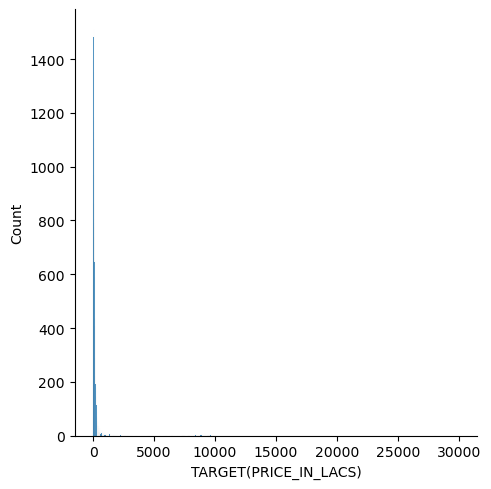

In [461]:
sns.displot(data=df, x = 'TARGET(PRICE_IN_LACS)')

In [462]:
np.log(df['TARGET(PRICE_IN_LACS)']).describe()

count    29050.000000
mean         4.209742
std          0.897782
min         -1.386294
25%          3.637586
50%          4.123094
75%          4.605170
max         10.308953
Name: TARGET(PRICE_IN_LACS), dtype: float64

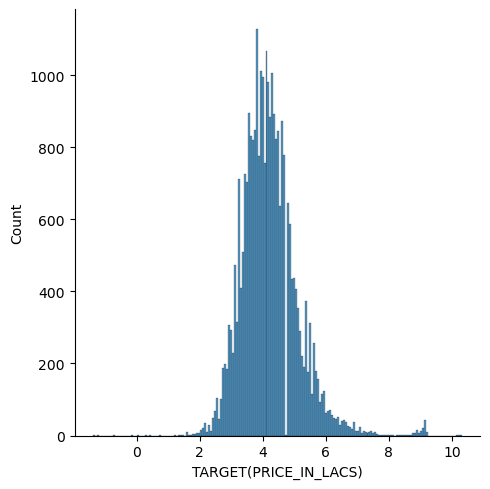

In [463]:
sns.displot(x = np.log(df['TARGET(PRICE_IN_LACS)']))

In [464]:
df['log_price'] = np.log(df['TARGET(PRICE_IN_LACS)'])

In [465]:
df.drop(columns= ['TARGET(PRICE_IN_LACS)'],inplace=True)

In [466]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,square_meter,BHK_OR_RK_RK,POSTED_BY_Dealer,POSTED_BY_Owner,city_0,city_1,city_2,city_3,city_4,city_5,log_price
count,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,0.821033,0.930361,1.861007e+03,0.000826,0.618279,0.360413,0.056971,0.281997,0.334114,0.345301,0.432014,0.503855,4.209742
std,0.383332,0.464869,0.880677,0.383332,0.254541,1.778546e+05,0.028732,0.485817,0.480129,0.231791,0.449979,0.471688,0.475475,0.495365,0.499994,0.897782
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.787091e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.386294
25%,0.000000,0.000000,2.000000,1.000000,1.000000,8.361274e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.637586
50%,0.000000,0.000000,2.000000,1.000000,1.000000,1.089513e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.123094
75%,0.000000,1.000000,3.000000,1.000000,1.000000,1.440154e+02,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.605170
max,1.000000,1.000000,20.000000,1.000000,1.000000,2.364805e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.308953


### spliting data into train test then scaling

In [517]:
from sklearn.model_selection import train_test_split

In [518]:
x = df.drop(columns=['log_price'])
y = df['log_price']

In [519]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.17,random_state=5,shuffle=True)

In [520]:
from sklearn.preprocessing import StandardScaler

In [521]:
scaler = StandardScaler()

In [522]:
columns_to_be_scaled = ['BHK_NO.','square_meter']

In [523]:
x_train[columns_to_be_scaled] = scaler.fit_transform(x_train[columns_to_be_scaled])

In [524]:
x_test[columns_to_be_scaled] = scaler.transform(x_test[columns_to_be_scaled])

In [525]:
x_train

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,square_meter,BHK_OR_RK_RK,POSTED_BY_Dealer,POSTED_BY_Owner,city_0,city_1,city_2,city_3,city_4,city_5
22106,0,1,-0.443684,1,1,-0.010714,0.0,1.0,0.0,0,1,0,0,0,1
15451,1,0,-0.443684,0,1,-0.010866,0.0,1.0,0.0,0,1,0,0,0,1
3664,0,1,-0.443684,1,1,-0.010713,0.0,1.0,0.0,0,0,0,0,0,1
8670,0,1,0.690023,1,1,-0.010571,0.0,1.0,0.0,0,0,1,0,0,0
28776,0,0,1.823731,1,1,-0.010544,0.0,0.0,1.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0,0.690023,1,1,-0.010734,0.0,1.0,0.0,0,0,0,1,0,0
26301,0,0,-0.443684,1,1,-0.010852,0.0,1.0,0.0,0,0,0,1,1,0
20463,0,0,0.690023,1,1,-0.010500,0.0,0.0,1.0,0,0,0,0,0,1
18638,1,0,-1.577391,0,0,-0.010901,0.0,0.0,0.0,1,0,0,1,1,1


### Machine learning

In [526]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [527]:
poly = PolynomialFeatures(degree=2)

In [528]:
x_train = poly.fit_transform(x_train)

In [529]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [530]:
y_pred = model.predict(poly.transform(x_test))

In [531]:
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.metrics import mean_absolute_error

In [532]:
mean_squared_error(y_test , y_pred , squared=False)

0.5370929116139644

In [533]:
x_test

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,square_meter,BHK_OR_RK_RK,POSTED_BY_Dealer,POSTED_BY_Owner,city_0,city_1,city_2,city_3,city_4,city_5
13831,0,0,0.690023,1,1,-0.010274,0.0,0.0,1.0,0,0,0,1,0,1
14125,0,0,0.690023,1,1,-0.010556,0.0,1.0,0.0,0,0,1,0,0,1
7457,0,0,0.690023,1,1,-0.010660,0.0,0.0,1.0,0,0,0,0,1,0
7823,0,0,-0.443684,1,1,-0.010757,0.0,1.0,0.0,0,0,1,1,0,0
26783,1,0,-1.577391,0,1,-0.011024,0.0,1.0,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25502,1,0,0.690023,0,1,-0.010531,0.0,1.0,0.0,0,1,1,0,1,0
18601,0,0,0.690023,1,1,-0.010429,0.0,0.0,1.0,0,0,0,0,1,0
26797,0,1,0.690023,1,1,-0.010494,0.0,1.0,0.0,1,0,0,0,1,1
15548,0,1,1.823731,1,1,-0.009881,0.0,1.0,0.0,1,0,0,0,1,1


In [534]:
y_test

13831    4.605170
14125    4.317488
7457     3.190476
7823     4.343805
26783    4.276666
           ...   
25502    4.177459
18601    4.442651
26797    4.060443
15548    4.554929
18070    4.007333
Name: log_price, Length: 4939, dtype: float64

In [535]:
r2_score(y_test, y_pred)

0.6471309220255753

In [536]:
y_train_pred = model.predict(x_train)

In [537]:
r2_score(y_train, y_train_pred)

0.6543711190104115

In [538]:
import joblib

In [539]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [540]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [541]:
joblib.dump(one_encoder, 'oneHotEncoder.pkl')

['oneHotEncoder.pkl']

In [542]:
joblib.dump(be,'binrayEncoder.pkl')

['binrayEncoder.pkl']